# Live Code 3 Phase 1

## Perkenalan

Nama:   Judan Syamsul Hadad

Batch:  FTDS009

- `country`   Name of the country
- `child_mort`  Death of children under 5 years of age per 1000 live births
- `exports`   Exports of goods and services. Given as %age of the Total GDP
- `health`	Total health spending as %age of Total GDP
- `imports`	Imports of goods and services. Given as %age of the Total GDP
- `Income`	Net income per person
- `Inflation`	The measurement of the annual growth rate of the Total GDP
- `life_expec`	The average number of years a new born child would live if the current - - `mortality` patterns are to remain the same
- `total_fer`	The number of children that would be born to each woman if the current age-fertility rates remain the same.
- `gdpp`	The GDP per capita. Calculated as the Total GDP divided by the total population.


### Problems

Sebuah lembaga LSM berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara kurang mampu. Baru-baru ini, mereka telah mampu mengumpulkan sekitar $ 10 juta. CEO LSM tersebut perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Isu signifikan yang muncul saat membuat keputusan ini terkait dengan pemilihan negara mana yang paling membutuhkan bantuan. 

Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara tersebut. Anda diwajibkan untuk menyarankan negara mana yang perlu menjadi fokus CEO. Jawab pertanyaan dibawah ini sebagai acuan analisa/cerita : 

1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?

4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?

5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !

[Dataset URL](https://www.kaggle.com/hellbuoy/pca-kmeans-hierarchical-clustering)

## Soal Nomor 1

1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

### Import Libraries

In [154]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#models
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### Data Loading

Set random state untuk keseluruhan notebook.

In [155]:
random_state = 34

Set agar semua kolom ditampilkan.

In [156]:
pd.set_option('display.max_columns', None)

Load dataset.

In [157]:
data = pd.read_csv('Country-data.csv')

Copy dataset.

In [158]:
df = data.copy()

Cek lima data teratas.

In [159]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Cek properties dari dataset.

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Terdapat 167 baris dan 10 kolom. Tidak ada missing value dan semua kolom kecuali `country` sudah dalam bentuk angka.

Pastikan kembali missing value pada kolom.

In [161]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Tidak ada missing value. Cek apakah ada duplikat.

In [162]:
df.duplicated().sum()

0

Tidak ada duplikat. Cek statistika deskriptif dataset.

In [163]:
df.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
child_mort,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Ada beberapa kolom yang terlihat memiliki outlier dengan beda signifikan antara min, quartil, dan max.

### Exploratory Data Analysis

#### Histogram

Cek distribusi data menggunakan histogram.

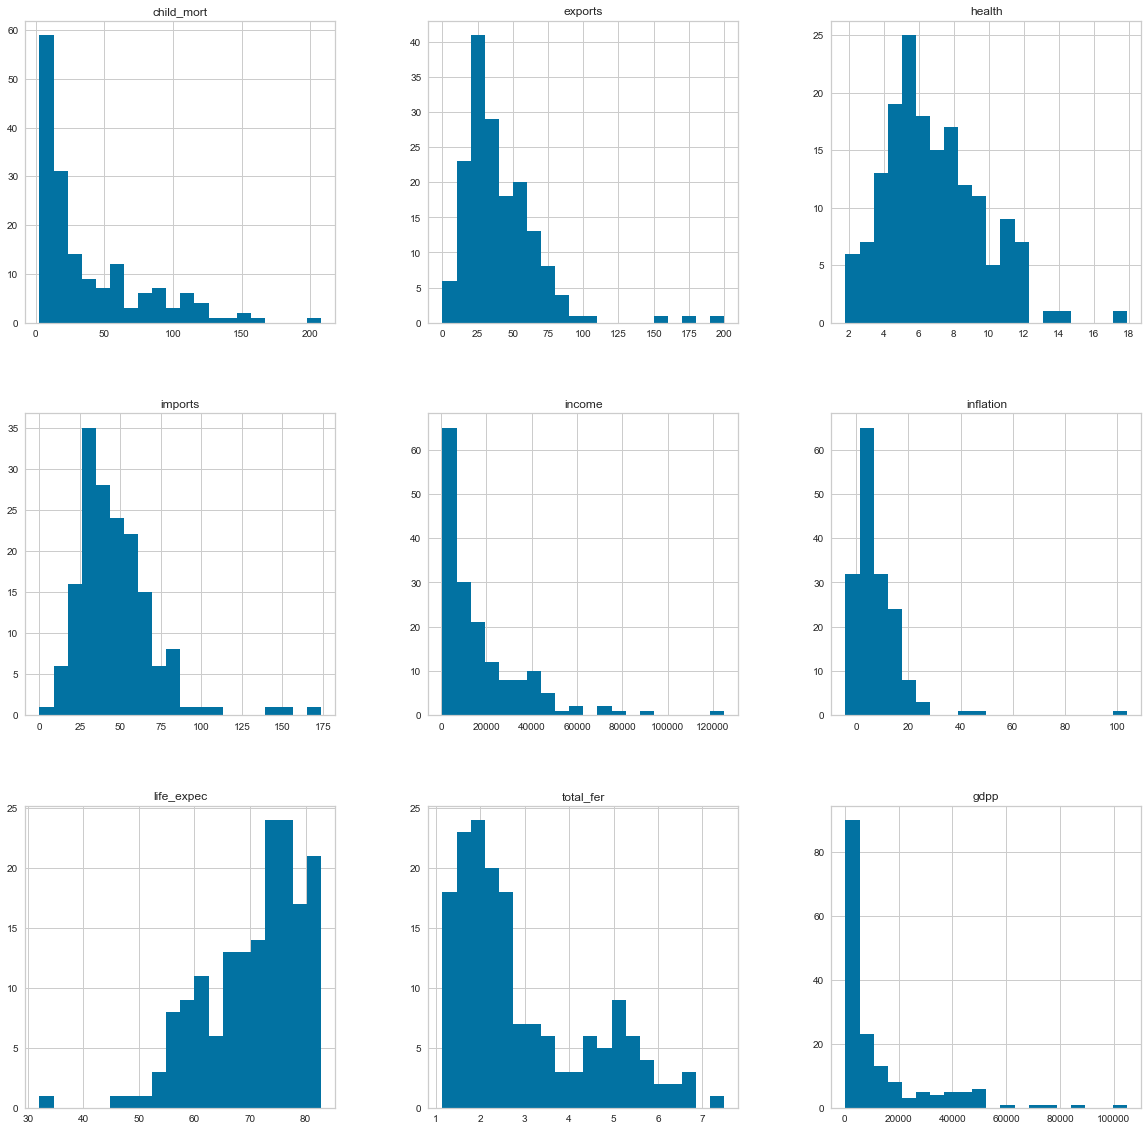

In [164]:
df.drop(columns='country').hist(bins=20, figsize=(20,20))
plt.show()

- Ada negara yang `life expectancy`-nya masih serendah 30-40 tahun, dimana di zaman modern ini rata-rata `life expectancy` global adalah 72.6 tahun.
- Ada negara yang memiliki nilai `inflasi` mencapai 100%
- `Income`, `GDPP`, dan `Child Mortality` terlihat memiliki bentuk kurva distribusi yang mirip

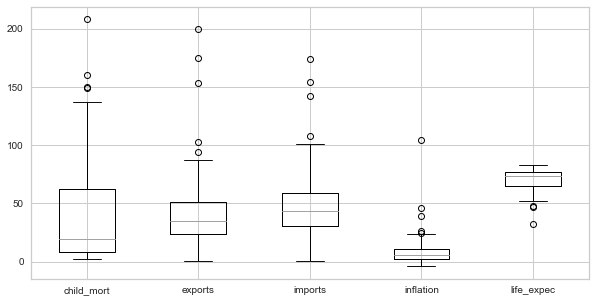

In [165]:
df[['child_mort', 'exports', 'imports', 'inflation', 'life_expec']].boxplot(figsize=(10,5))
plt.show()

- Ada negara dengan `child_mort` yang tinggi sekali melebihi 200

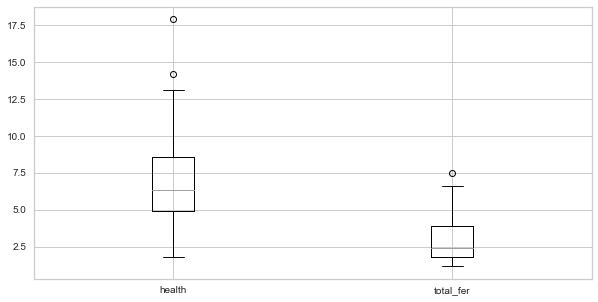

In [166]:
df[['health', 'total_fer']].boxplot(figsize=(10,5))
plt.show()

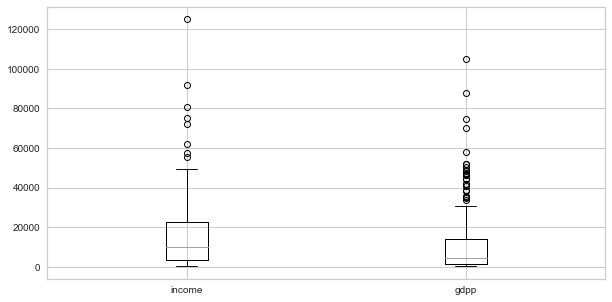

In [167]:
df[['income', 'gdpp']].boxplot(figsize=(10,5))
plt.show()

Banyak outlier terutama di `GDPP`

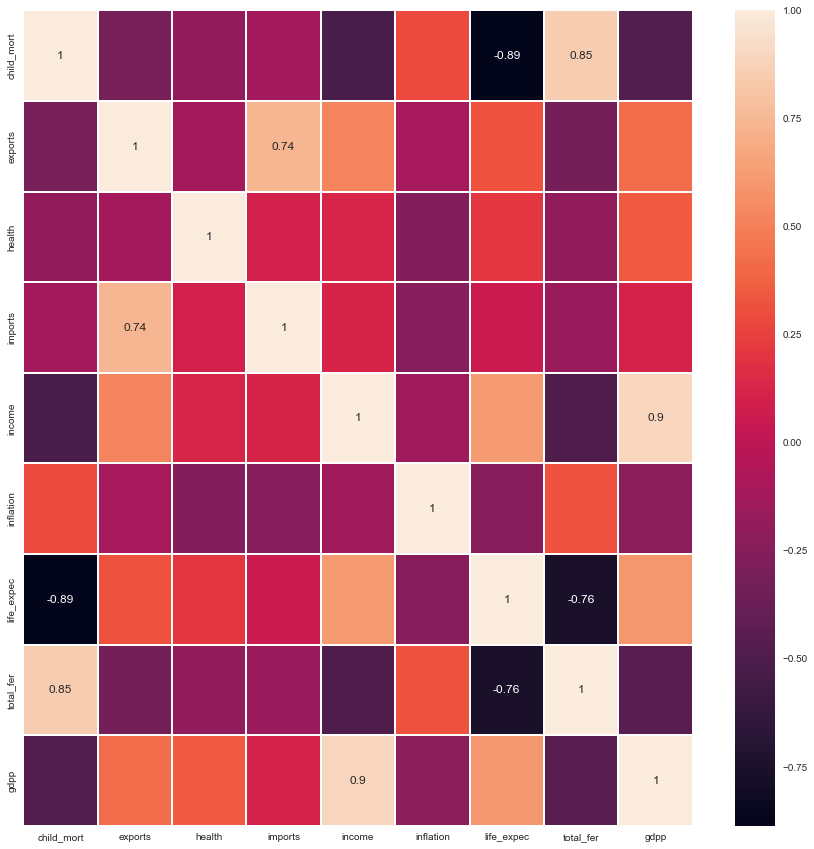

In [168]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.drop(columns='country').corr(), annot=True, linewidths=0.2)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

- Ada hubungan yang kuat antara `child_mort`, `life_expec`, dan `total_fer`. Meningkatnya `child_mort` menyebabkan penurunan `life_expec` dan kenaikan `total_fer`. Jika dianalogika secara kasar, ketika anak di dalam keluarga meninggal, maka keluarga mencoba untuk memiliki anak lagi. Siklus ini berulang dan menyebabkan `life_expec` menurun.
- Ada hubungan positif yang kuat antara `exports` dan `imports`
- Ada hubungan positif yang kuat antara `income` dan `gdpp`

## Soal Nomor 2

2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

### Data Preprocessing

Ambil tiga data untuk inference.

In [169]:
df_inf = df.dropna().sample(3, random_state=random_state)
X = df.drop(index=df_inf.index)
df_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.440,74.6,2.60,5450


Hapus kolom country untuk clustering.

In [170]:
X.drop(columns='country',inplace=True)

#### Outliers Handling

Buat fungsi untuk deteksi outlier.

In [171]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

def outliersum(dataframe):
    #variable untuk summary
    distribution = []
    skewness = []
    upper_limit = []
    lower_limit = []
    outliers_percent = []
    max = []
    min = []

    #loop untuk summary outlier
    for column in dataframe.columns:

        #cek skewness
        col_skewness = dataframe[column].skew()

        #conditional berdasarkan skewnewss
        if (col_skewness >= -0.5) & (col_skewness <= 0.5):
            col_distribution = 'Normal'
            col_upper_limit, col_lower_limit = find_normal_boundaries(dataframe,column)      
        else:
            col_distribution = 'Skewed'
            col_upper_limit, col_lower_limit = find_skewed_boundaries(dataframe,column)
        
        #cek min,max, dan jumlah outlier
        col_max = dataframe[column].max()
        col_min = dataframe[column].min()
        col_outliers_percent = (len(dataframe[dataframe[column] > col_upper_limit]) +  \
                                len(dataframe[dataframe[column] < col_lower_limit])) / \
                                len(dataframe) * 100
        
        #update summary per loop
        distribution.append(col_distribution)
        skewness.append(col_skewness)
        upper_limit.append(col_upper_limit)
        max.append(col_max)
        min.append(col_min)
        lower_limit.append(col_lower_limit)
        outliers_percent.append(col_outliers_percent)

    #df summary
    outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'min':min , 'lower_limit':lower_limit, 'upper_limit':upper_limit, 'max':max, 'outliers_percent':outliers_percent}
    outliers_summary = pd.DataFrame(outliers_summary,index=dataframe.columns)
    outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
    outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
    return outliers_summary

Cek outlier.

In [172]:
outsum = outliersum(X)
outsum

,distribution_type,skewnewss,min,lower_limit,upper_limit,max,outliers_percent
gdpp,Skewed,2.27,231.00,-17312.50,32427.50,105000.00,14.63
income,Skewed,2.26,609.00,-25718.75,51831.25,125000.00,4.88
exports,Skewed,2.44,0.11,-17.60,92.80,200.00,3.05
inflation,Skewed,5.11,-4.21,-11.85,24.63,104.00,3.05
child_mort,Skewed,1.43,2.60,-72.24,142.86,208.00,2.44
imports,Skewed,1.92,0.07,-13.07,101.72,174.00,2.44
life_expec,Skewed,-0.98,32.10,48.05,94.05,82.80,1.83
health,Skewed,0.73,1.81,-0.56,14.00,17.90,1.22
total_fer,Skewed,0.97,1.15,-1.33,6.98,7.49,0.61


Meskipun banyak outlier, tidak akan dilakukan handling karena outlier ini merupakan data ril dan perlu dipertimbangkan saat klasifikasi.

#### Missing Values Handling

Tidak ada missing value.

In [173]:
X.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Feature Scaling

Untuk PCA dan clustering dengan K-Means, perlu dilakukan feature scaling dengan StandardScaler.

In [174]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### Variance Inflation Factor

Cek nilai VIF untuk menentukan apakah feature dapat direduksi atau tidak.

In [175]:
#pembuatan dataframe VIF
df_vif = pd.DataFrame()
df_vif["Feature"] = X_scaled.columns
  
#hitung dan urutkan VIF dari kecil ke besar
df_vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(len(X_scaled.columns))]
df_vif.sort_values('VIF',ascending=True,inplace=True)
df_vif.reset_index(drop=True,inplace=True)
df_vif

,Feature,VIF
0,inflation,1.283387
1,health,1.757055
2,imports,3.698654
3,total_fer,3.814194
4,exports,4.932346
5,life_expec,6.079747
6,gdpp,7.398805
7,income,7.531861
8,child_mort,7.795590


Ada empat feature yang memiliki nilai VIF lebih besar dari 5 sehingga bisa dipertimbangkan untuk direduksi.

#### Explained Variance Ratio

Pastikan jumlah komponen yang akan direduksi dengan melihat nilai cummulative EVR pada grafik berikut.

In [176]:
#hitung EVR
X_evr = PCA().fit(X_scaled)
components = len(X_scaled.columns) + 1

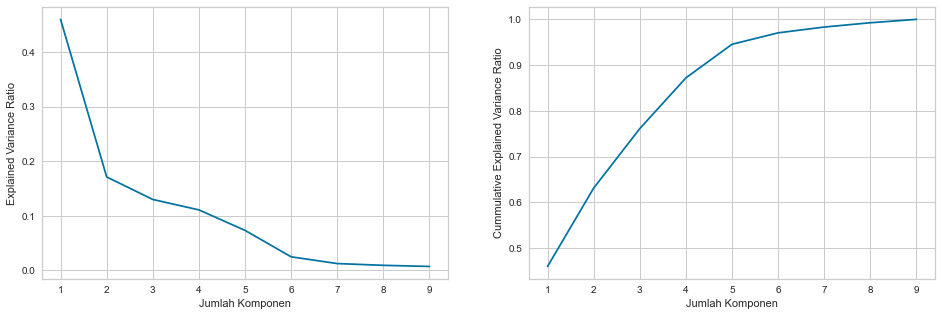

In [177]:
#plot EVR dan cummulative EVR
fig,ax=plt.subplots(ncols=2, figsize=(16,5))
ax[0].plot(range(1,components), X_evr.explained_variance_ratio_)
ax[0].set_xlabel('Jumlah Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,components), np.cumsum(X_evr.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Cummulative Explained Variance Ratio')
plt.show()

Sekitar 90-95% EVR dapat di-cover hanya dengan 5 komponen saja. Reduksi jumlah komponen. 

In [178]:
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(164, 5)

Komponen direduksi menjadi 5.

#### Initial Data Visualization

Cek distribusi data dalam plot 2 dimensi apakah ada kluster yang sudah terlihat atau belum.

In [179]:
#reduksi ke 2 dimensi
pca_vis2d = PCA(n_components=2, random_state=random_state)
X_pca_vis2d = pca_vis2d.fit_transform(X_pca)

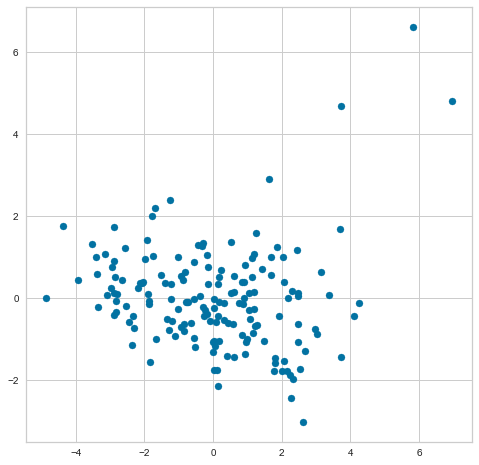

In [180]:
#plot 2 dimensi
plt.figure(figsize=(8,8))
plt.scatter(x=X_pca_vis2d[:,0], y=X_pca_vis2d[:,1])
plt.show()

Data terkumpul di sekitar (0,0) menyebar ke kiri dan ke kanan. Ada beberapa data yang berada cukup jauh dari centroid overall data. Untuk saat ini diperkirakan akan ada empat kluster, tiga kluster membagi kumpulan data di sekitar (0,0) dan satu kluster untuk outlier.

Sekarang lakukan cara yang sama, tetapi dengan mengaplikasikan normalisasi pada X_scaled.

Normalisasi.

In [181]:
normalizer = Normalizer()
X_norm = normalizer.fit_transform(X_scaled)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

Cek VIF.

In [182]:
#pembuatan dataframe VIF
df_vif = pd.DataFrame()
df_vif["Feature"] = X_norm.columns
  
#hitung dan urutkan VIF dari kecil ke besar
df_vif["VIF"] = [variance_inflation_factor(X_norm.values, i) for i in range(len(X_norm.columns))]
df_vif.sort_values('VIF',ascending=True,inplace=True)
df_vif.reset_index(drop=True,inplace=True)
df_vif

,Feature,VIF
0,inflation,1.401718
1,health,1.470837
2,imports,2.007866
3,exports,2.321008
4,total_fer,3.578709
5,life_expec,3.772200
6,child_mort,5.683423
7,gdpp,7.850226
8,income,8.356964


VIF menunjukkan komponen dapat direduksi menjadi 6. Cek dengan EVR.

In [183]:
#hitung EVR
X_evr = PCA().fit(X_norm)
components = len(X_norm.columns) + 1

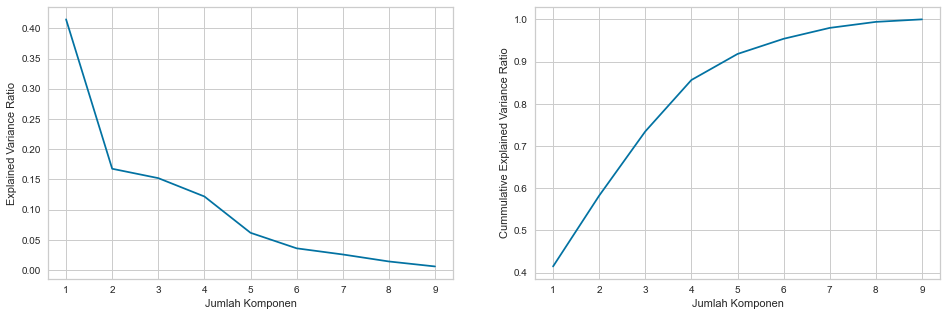

In [184]:
#plot EVR dan cummulative EVR
fig,ax=plt.subplots(ncols=2, figsize=(16,5))
ax[0].plot(range(1,components), X_evr.explained_variance_ratio_)
ax[0].set_xlabel('Jumlah Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,components), np.cumsum(X_evr.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Cummulative Explained Variance Ratio')
plt.show()

Dari EVR kira-kira 95% data dapat di-cover oleh 6 komponen.

In [185]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

(164, 6)

Visualisasikan pada 2 dimensi.

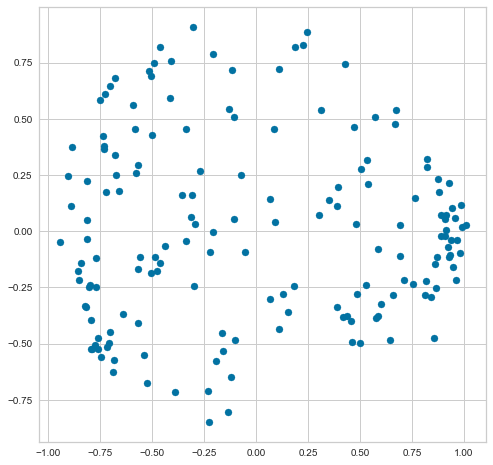

In [186]:
#reduksi ke 2 dimensi
pca_vis2d = PCA(n_components=2, random_state=random_state)
X_pca_vis2d = pca_vis2d.fit_transform(X_pca)

#plot 2 dimensi
plt.figure(figsize=(8,8))
plt.scatter(x=X_pca_vis2d[:,0], y=X_pca_vis2d[:,1])
plt.show()

Pada data hasil normalisasi bisa terlihat ada kemungkinan dua kluster yang terbentuk di kiri dan kanan garis vertikal pada x=0.

Data normalisasi akan digunakan untuk modeling.

### Model Definition

Model yang digunakan adalah K-Means.

In [187]:
kmeans = KMeans(random_state=random_state, init='k-means++')

### Model Training

Lakukan training untuk beberapa ukuran kluster.

In [188]:
#list untuk menampung metrics
inertia = []
silhouette = []
range_values = range(2,10)

#loop clustering untuk jumlah kluster sebanyak range_values
for i in range_values:
    kmeans = KMeans(n_clusters = i, random_state=random_state)
    cls_pred = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_pca, cls_pred))

#dataframe untuk menampung metrics
df_inertia = pd.DataFrame({'inertia':inertia, 'silhouette':silhouette}).reset_index()
df_inertia['index']+=2
df_inertia.rename(columns={'index':'k'},inplace=True)

### Model Evaluation

Cek jumlah kluster terbaik berdasarkan elbow method dan silhouette score.

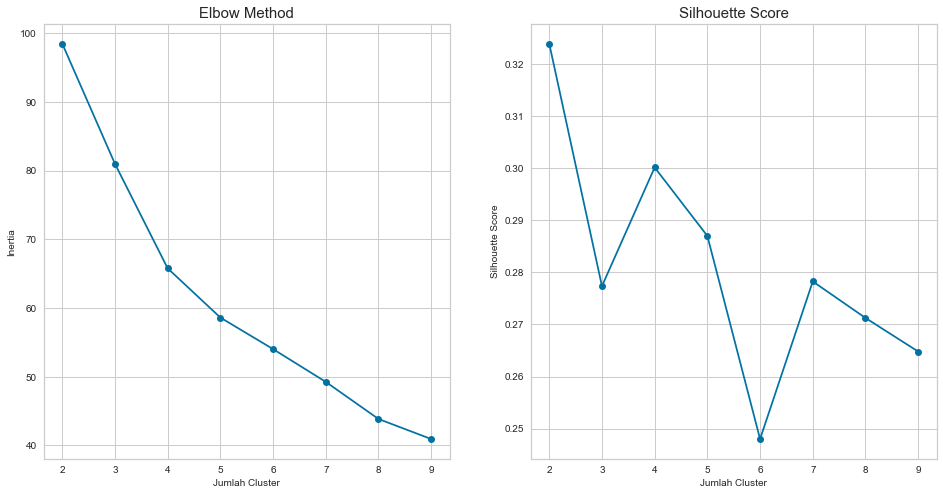

In [189]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
plt.subplot(1,2,1)
ax[0] = plt.plot(df_inertia['k'], df_inertia['inertia'], marker = 'o')
ax[0] = plt.xlabel('Jumlah Cluster', fontsize = 10)
ax[0] = plt.ylabel('Inertia', fontsize = 10)
ax[0] = plt.title('Elbow Method', fontsize = 15)

plt.subplot(1,2,2)
ax[1] = plt.plot(df_inertia['k'], df_inertia['silhouette'], marker = 'o')
ax[1] = plt.xlabel('Jumlah Cluster', fontsize = 10)
ax[1] = plt.ylabel('Silhouette Score', fontsize = 10)
ax[1] = plt.title('Silhouette Score', fontsize = 15)
plt.show()

Dari elbow method, patahan terbentuk di jumlah kluster 4. Pada silhouette score, nilai tertinggi terbentuk pada 2 kluster, diikuti oleh 4 kluster. Cek bentuk silhouette yang dihasilkan.

In [190]:
def plot_silhouette(dataframe, clussize):
    # Silhoutte Score for K-means
    min_range = clussize - 1
    max_range = clussize + 1
    k_range = range(min_range, max_range+1)
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    for n_cluster in k_range:
        km = KMeans(n_clusters=n_cluster, random_state=random_state).fit(dataframe)
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=axes[n_cluster-min_range])
        visualizer.fit(dataframe)
        visualizer.finalize()
        axes[n_cluster-min_range].set_xlim(-0.1, 1)

    plt.tight_layout()

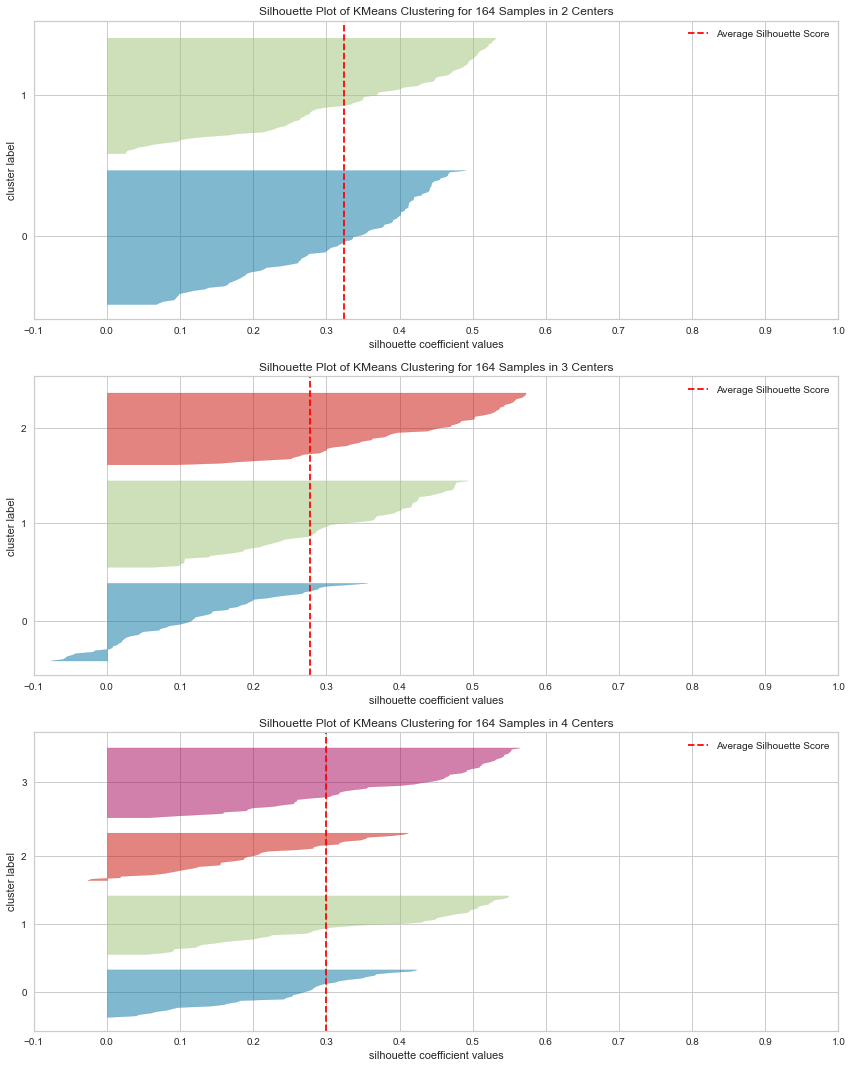

In [191]:
plot_silhouette(X_pca, 3)

Silhouette pada jumlah kluster 2 terlihat lebih berimbang dibandingkan jumlah kluster 3 dan 4. Score-nya pun paling tinggi. Agar lebih meyakinkan, cek visualisasi data pada plot 2 dimensi berikut.

In [192]:
#buat label 4 kluster
kmeans = KMeans(n_clusters = 4, random_state=random_state)
kmeans.fit_predict(X_pca)
km4_label = kmeans.labels_

In [193]:
#buat label 2 kluster
kmeans = KMeans(n_clusters = 2, random_state=random_state)
kmeans.fit_predict(X_pca)
km2_label = kmeans.labels_

In [194]:
#reduksi data ke 2 dimensi
pca_vis2d = PCA(n_components=2, random_state=random_state)
X_pca_vis2d = pca_vis2d.fit_transform(X_pca)

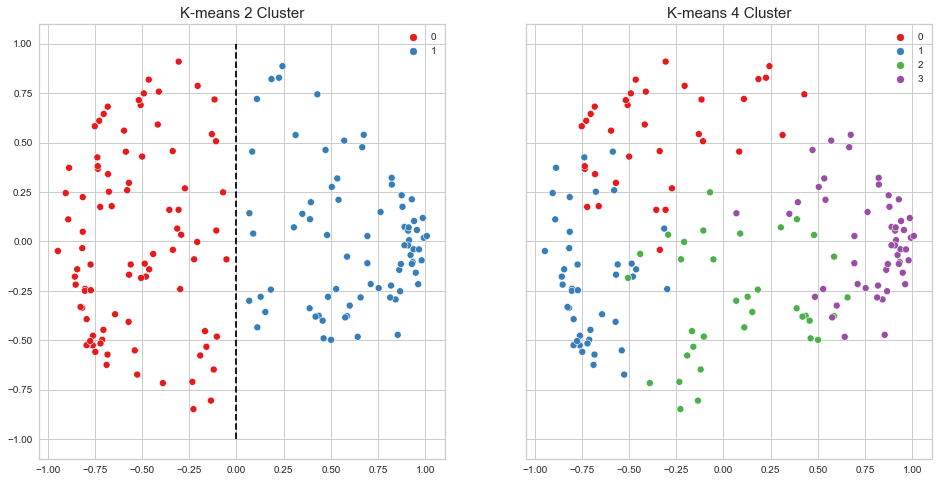

In [195]:
#plot 2 dimensi
fig, ax = plt.subplots(ncols=2, figsize=(16,8), sharey=True)

plt.subplot(1,2,1)
plt.title('K-means 2 Cluster', fontsize = 15)
sns.scatterplot(x=X_pca_vis2d[:,0], y=X_pca_vis2d[:,1], hue=km2_label, palette='Set1', ax=ax[0])
plt.plot([0,0], [-1,1],color='black',linestyle='--')

plt.subplot(1,2,2)
plt.title('K-means 4 Cluster', fontsize = 15)
sns.scatterplot(x=X_pca_vis2d[:,0], y=X_pca_vis2d[:,1], hue=km4_label, palette='Set1', ax=ax[1])
plt.show()

Pada plot 2 dimensi, batas kluster terlihat jelas pada garis vertikal di x = 0. Oleh karena itu, jumlah kluster yang dipilih adalah 2.

### Model Inference

Lakukan inference dengan menggunakan model yang sudah dibuat.

In [196]:
df_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.440,74.6,2.60,5450


Scaling dan normalisasi.

In [197]:
df_inf_scaled = scaler.transform(df_inf.drop(columns='country'))
df_inf_norm = normalizer.transform(df_inf_scaled)

Reduksi komponen.

In [198]:
df_inf_pca = pca.transform(df_inf_norm)
df_inf_pca.shape

(3, 6)

Prediksi cluster.

In [199]:
df_inf['cluster'] = kmeans.predict(df_inf_pca) + 1
df_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,1
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290,2
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.440,74.6,2.60,5450,1


Data berhasil dipisahkan ke cluster.

## Soal Nomor 3

3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?

### Cluster EDA

Tambahkan label ke data.

In [200]:
X['cluster'] = km2_label + 1

Buat barplot untuk seluruh feature.

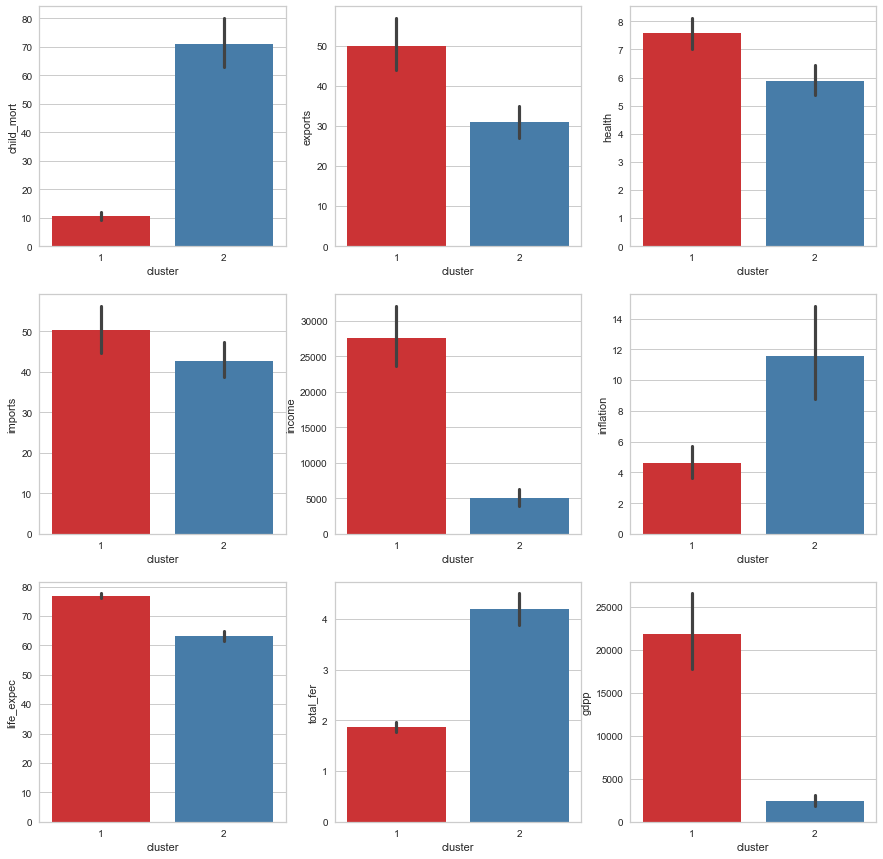

In [201]:
#indikator posisi grafik pada grid
i=0
j=0

#loop grid barplot
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
for col in X.columns:
    if col != 'cluster':
        sns.barplot(x=X['cluster'], y=X[col], color=X['cluster'], palette='Set1', ax=ax[j,i%3])

    i+=1
    if i%3==0:
        j+=1

plt.show()

Jika dilihat pada barplot, berikut karakteristik yang dimiliki oleh masing-masing kluster:
- kluster 1: `child_mort`, `total_fer`, `inflation` rendah dan `imports`, `exports`, `gdpp`, `income`, `life_expec`, `health` tinggi
- kluster 2: `child_mort`, `total_fer`, `inflation` tinggi dan `imports`, `exports`, `gdpp`, `income`, `life_expec`, `health` rendah

## Soal Nomor 4

4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?

### Cluster Description

Kluster 1 bisa kita sebut sebagai **Negara Maju** dimana kekuatan sosioekonomik penduduknya sangat tinggi dilihat dari `gdpp` dan `income` yang tinggi didukung oleh `inflation` yang rendah sehingga biaya kesehatan yang dianggarkan (`health`) oleh masing-masing orang lebih besar dan menyebabkan turunnya `child_mortality` dan memperpanjang `life_expectancy`. Hal ini juga menyebabkan nilai `total_fer` turun dengan anggapan bahwa anak-anaknya sehat sampai tua sehingga tidak perlu menambah anak dalam keluarga untuk meneruskan keturunan.

Kluster 2 bisa kita sebut sebagai **Negara Berkembang** dimana kekuatan sosioekonomik penduduknya rendah dilihat dari `gdpp` dan `income` yang lebih rendah ditambah `inflation` yang lebih tinggi dibandingkan **Negara Maju**.

Dampak dari pengaruh sosioekonomik tersebut adalah biaya kesehatan yang dianggarkan (`health`) lebih rendah dan jauh lebih banyak terjadi `child_mortality` dan lebih rendahnya `life_expectancy`. Seperti penjelasan pada EDA, untuk meneruskan keturunan keluarga, akhirnya keluarga yang kehilangan anaknya mencoba untuk memiliki anak lagi dan siklus ini berulang.

## Soal Nomor 5

5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !

### Kesimpulan

Berikut kesimpulan yang didapat berdasarkan analisis yang telah dilakukan dari modeling, EDA, dan cluster EDA:

1. Data dinormalisasi dan direduksi menjadi 6 komponen
2. Jumlah kluster terbaik yang dihasilkan adalah 2 kluster
3. Kluster terdiri dari **Negara Maju** dan **Negara Berkembang**. **Negara Maju** memiliki kekuatan sosioekonomik yang tinggi dengan `child_mortality` dan `inflation` yang rendah, sedangkan **Negara Berkembang** memiliki kekuatan sosioekonomik yang rendah dengan `child_mortality` dan `inflation` yang tinggi
4. EDA dan cluster EDA menunjukkan bahwa ada hubungan antara `income` dan `gdpp` dengan `child_mort` dan hasil clustering menyatakan dengan menurunnya `income` dan `gdpp`, maka terjadi peningkatan `child_mort` pada suatu negara
5. EDA dan cluster EDA menunjukkan bahwa meningkatnya `child_mort` akan sejalan dengan meningkatnya `total_fer` dan menurunnya `life_expec` pada suatu negara
6. EDA dan cluster EDA menunjukkan bahwa meningkatnya `exports` dan `imports` ternyata juga berkaitan dengan kekuatan sosioekonomik suatu negara yang diwakilkan dengan ikut naiknya `income`, `gdpp`, dan `health` serta turunnya `inflation`